Plots: FitImagingPlotter
========================

This example illustrates how to plot an `FitImaging` object using an `FitImagingPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load example imaging of of a strong lens as an `Imaging` object.

In [2]:
dataset_name = "light_sersic__mass_sie__source_sersic"
dataset_path = path.join("dataset", "imaging", "with_lens_light", dataset_name)

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    pixel_scales=0.1,
)

We now mask the data and fit it with a `Tracer` to create a `FitImaging` object.

In [3]:
mask = al.Mask2D.circular(
    shape_native=imaging.shape_native,
    pixel_scales=imaging.pixel_scales,
    sub_size=1,
    radius=3.0,
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    bulge=al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, phi=45.0),
        intensity=1.0,
        effective_radius=0.8,
        sersic_index=4.0,
    ),
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0),
        einstein_radius=1.6,
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, phi=45.0),
    ),
    shear=al.mp.ExternalShear(elliptical_comps=(0.05, 0.05)),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.8, phi=60.0),
        intensity=0.3,
        effective_radius=0.1,
        sersic_index=1.0,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

We now pass the FitImaging to an `FitImagingPlotter` and call various `figure_*` methods to plot different attributes.

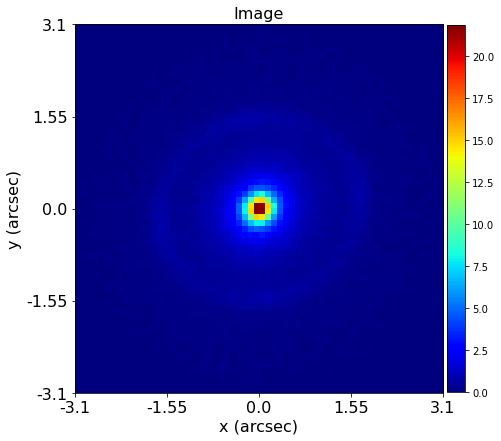

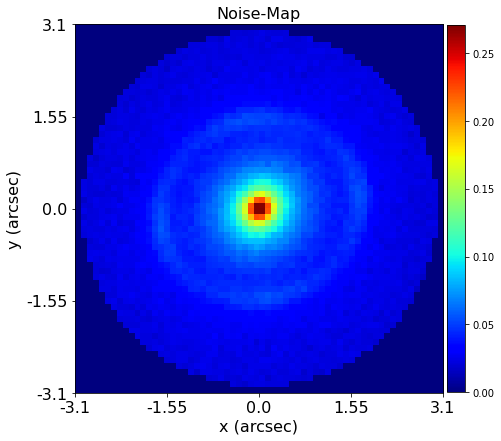

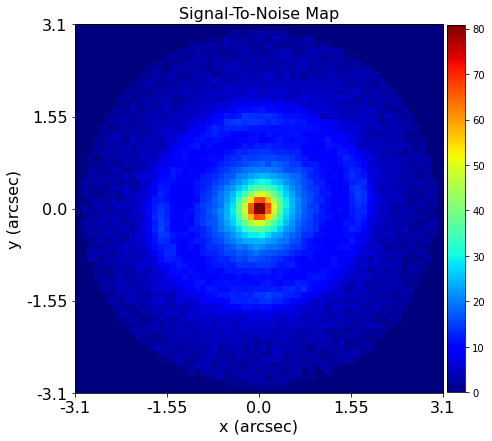

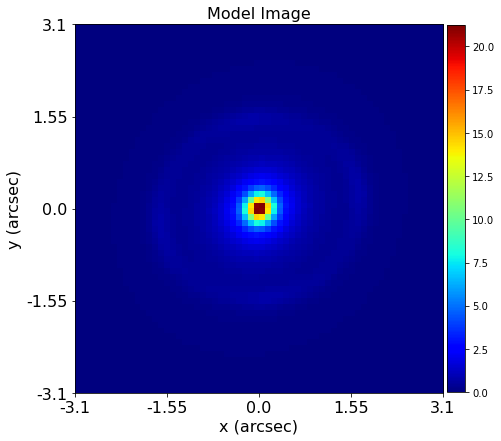

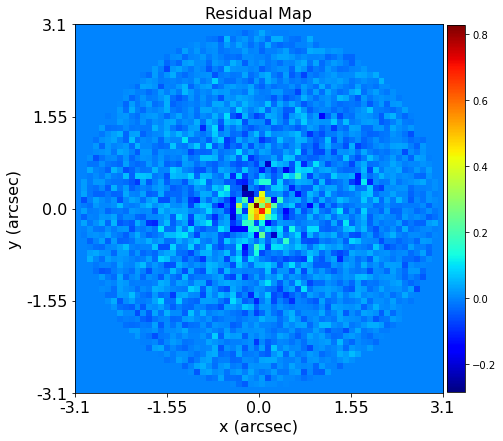

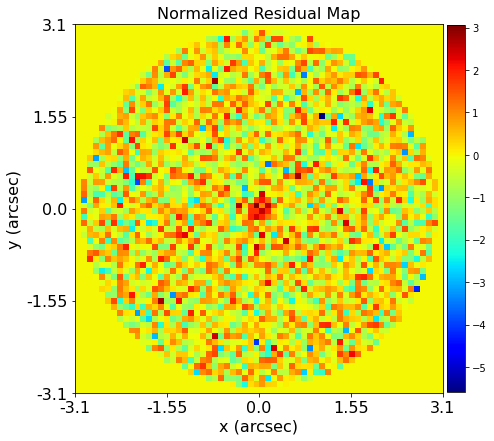

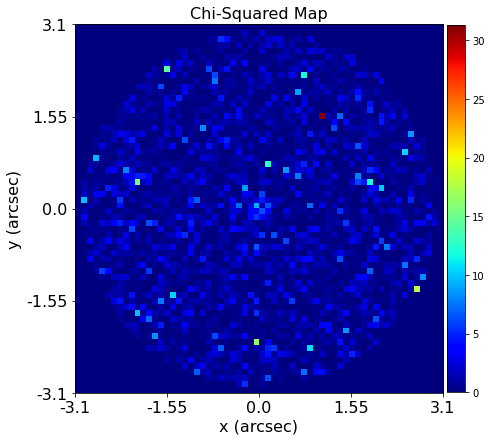

In [4]:
fit_imaging_plotter = aplt.FitImagingPlotter(fit=fit)
fit_imaging_plotter.figures(
    image=True,
    noise_map=True,
    signal_to_noise_map=True,
    model_image=True,
    residual_map=True,
    normalized_residual_map=True,
    chi_squared_map=True,
)

The `FitImagingPlotter` may also plot a subplot of these attributes.

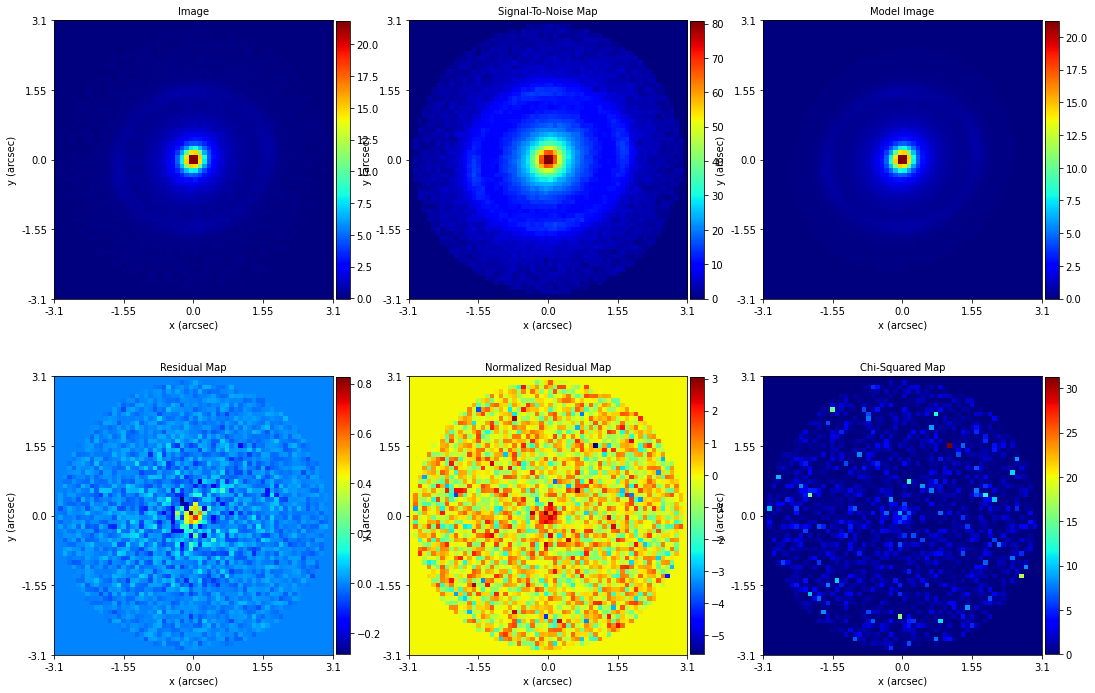

In [5]:
fit_imaging_plotter.subplot_fit_imaging()

It can plot of the model image of an input plane.

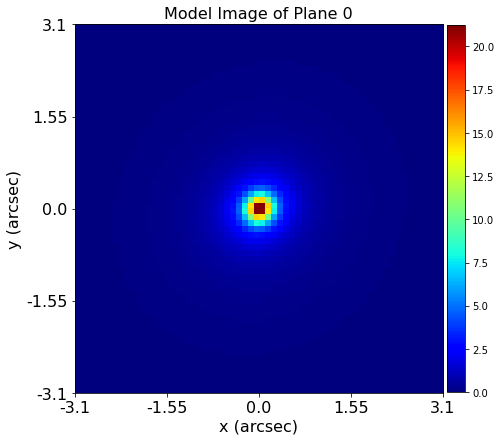

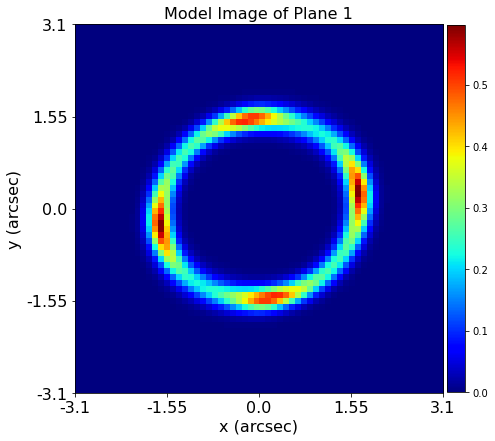

In [6]:
fit_imaging_plotter.figures_2d_of_planes(model_image=True, plane_index=0)
fit_imaging_plotter.figures_2d_of_planes(model_image=True, plane_index=1)

It can plot the image of a plane with all other model images subtracted.

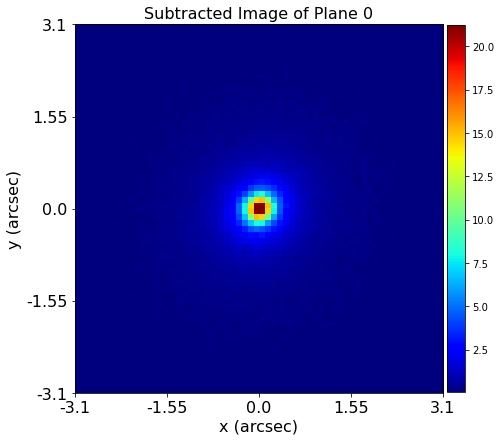

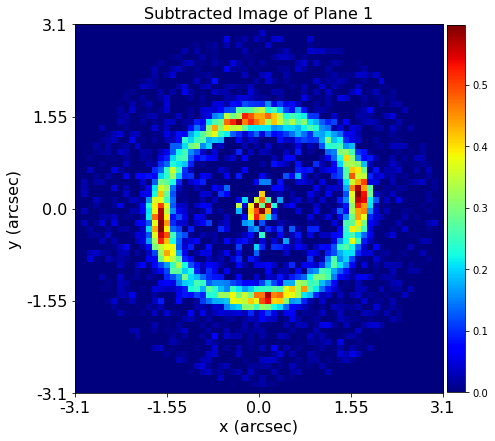

In [7]:
fit_imaging_plotter.figures_2d_of_planes(subtracted_image=True, plane_index=0)
fit_imaging_plotter.figures_2d_of_planes(subtracted_image=True, plane_index=1)

It can also plot the plane-image of a plane, that is what the source galaxy looks like without lensing (e.g.
for `plane_index=1` this is the source-plane image)

In [8]:
fit_imaging_plotter.figures_2d_of_planes(plane_index=0)
fit_imaging_plotter.figures_2d_of_planes(plane_index=1)

A subplot of a plane, showing the above 3 figures,can also be plotted.

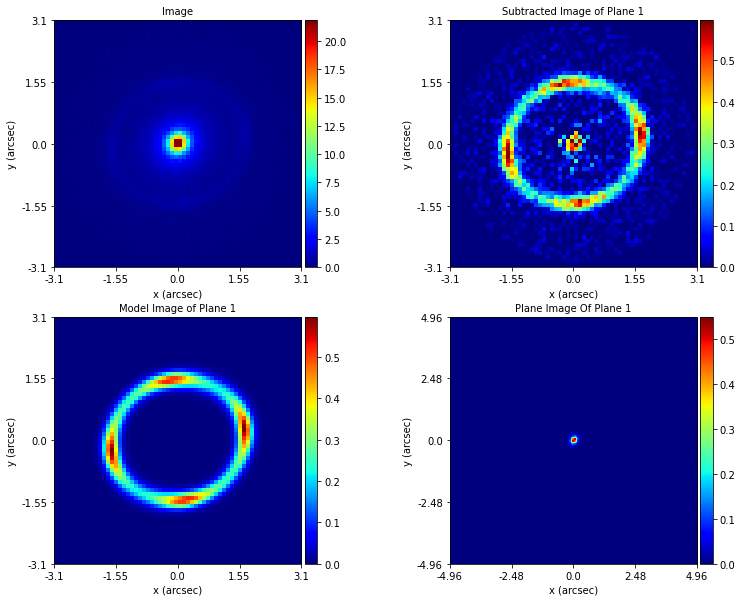

In [9]:
fit_imaging_plotter.subplot_of_planes(plane_index=1)

`FitImaging` contains the following attributes which can be plotted automatically via the `Include2D` object.

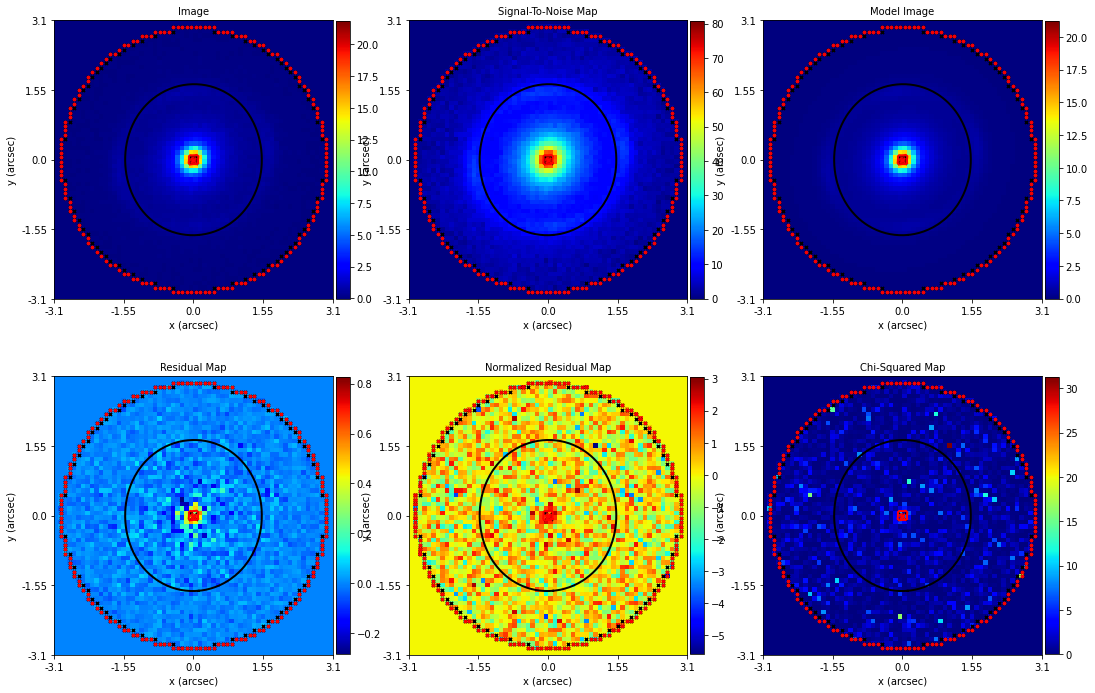

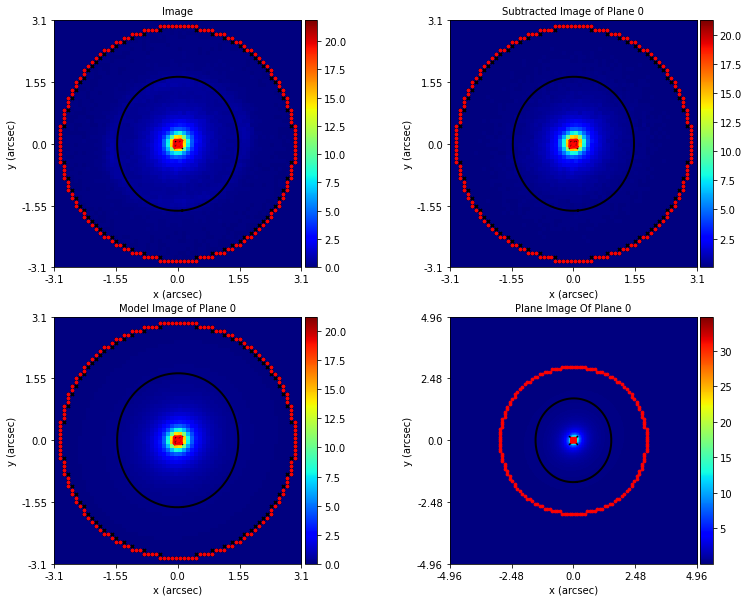

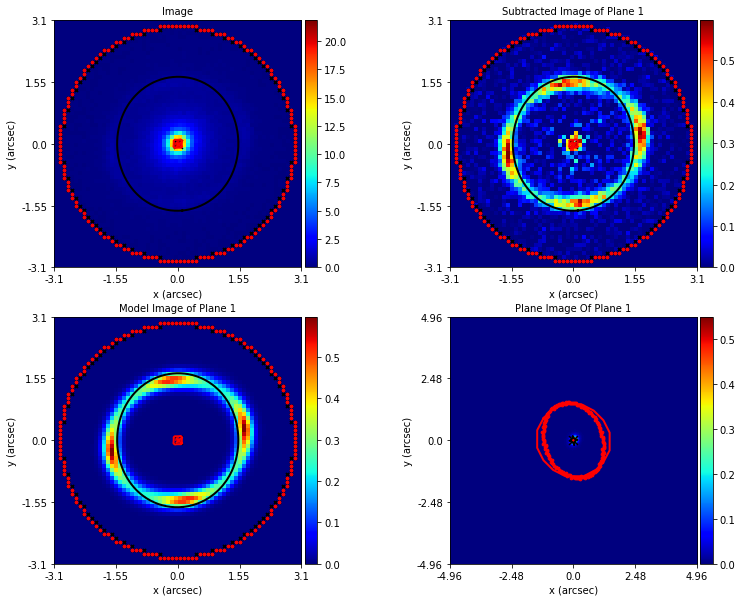

In [10]:
include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    light_profile_centres=True,
    mass_profile_centres=True,
    critical_curves=True,
    caustics=True,
)
fit_plotter = aplt.FitImagingPlotter(fit=fit, include_2d=include_2d)
fit_plotter.subplot_fit_imaging()
fit_plotter.subplot_of_planes(plane_index=0)
fit_plotter.subplot_of_planes(plane_index=1)

We can also plot a `FitImaging` which uses an `Inversion`.

In [11]:
source_galaxy = al.Galaxy(
    redshift=1.0,
    pixelization=al.pix.VoronoiMagnification(shape=(25, 25)),
    regularization=al.reg.Constant(coefficient=1.0),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numba/core/ir_utils.py:2067: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'slim_indexes' of function 'furthest_grid_2d_slim_index_from'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../PyAutoArray/autoarray/structures/grids/two_d/grid_2d_util.py", line 673:
@decorator_util.jit()
def furthest_grid_2d_slim_index_from(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


The `plane_image_from_plane` method now plots the the reconstructed source on the Voronoi pixel-grid. It can use the
`Include2D` object to plot the `Mapper`'s specific structures like the image and source plane pixelization grids.

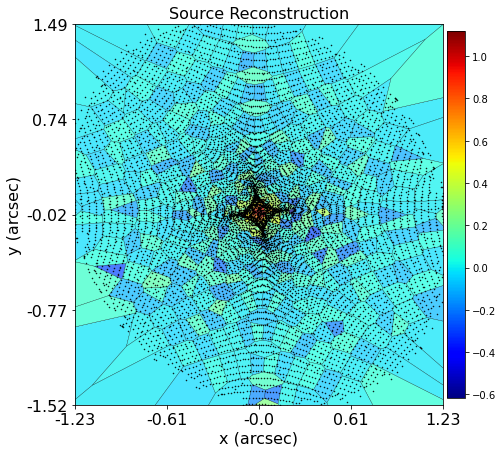

In [12]:
include_2d = aplt.Include2D(
    mapper_data_pixelization_grid=True, mapper_source_grid_slim=True
)

fit_plotter = aplt.FitImagingPlotter(fit=fit, include_2d=include_2d)
fit_plotter.figures_2d_of_planes(plane_image=True, plane_index=1)

In fact, via the `FitImagingPlotter` we can plot the `reconstruction` with casutics and a border, which are extracted 
from the `Tracer` of the `FitImaging`. 

To do this with an `InversionPlotter` we would have had to manually pass these attributes via the `Visuals2D` object.

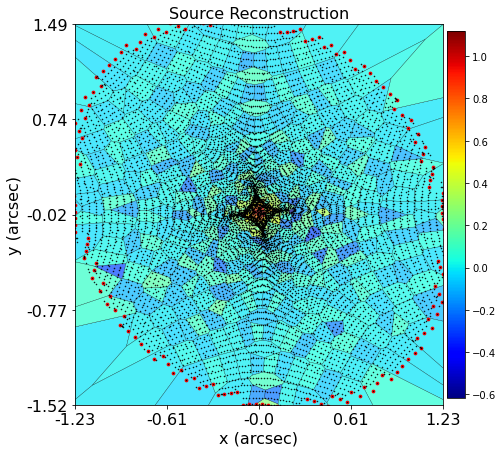

In [13]:
include_2d = aplt.Include2D(
    border=True,
    caustics=True,
    mapper_data_pixelization_grid=True,
    mapper_source_grid_slim=True,
)

fit_plotter = aplt.FitImagingPlotter(fit=fit, include_2d=include_2d)
fit_plotter.figures_2d_of_planes(plane_image=True, plane_index=1)

We can even extract an `InversionPlotter` from the `FitImagingPlotter` and use it to plot all of its usual methods, 
which will now include the caustic and border.

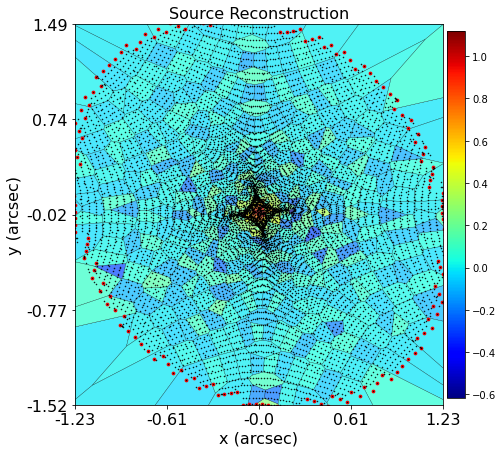

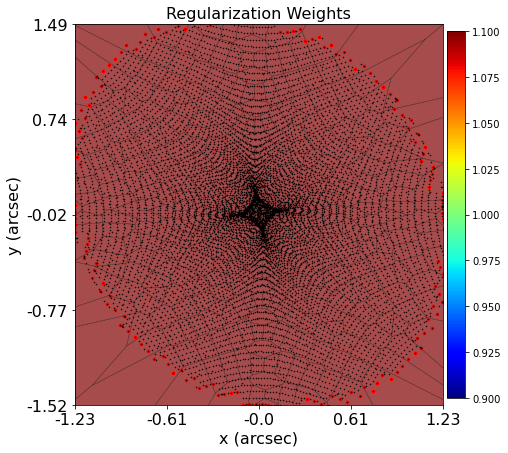

In [14]:
inversion_plotter = fit_plotter.inversion_plotter_of_plane(plane_index=1)
inversion_plotter.figures(reconstruction=True, regularization_weights=True)

Finish.